<a href="https://colab.research.google.com/github/santoshgurujula/Springboard/blob/master/DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# First, import the relevant modules
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import glob as gb


In [2]:
#pointing the path to google drive folder
%cd '/content/drive/My Drive/Springboard/data'
!ls

/content/drive/My Drive/Springboard/data
BOM500002.csv  BOM500009.csv  BOM500013.csv  BOM500023.csv
BOM500003.csv  BOM500010.csv  BOM500014.csv  DJI.csv
BOM500008.csv  BOM500012.csv  BOM500020.csv  nasdl.csv


In [0]:
#to read only BSE stock csv files
pattern='BOM*.csv'
#read csv files 
csv_files=gb.glob(pattern)

In [4]:
#print list of data files
print(csv_files)

['BOM500002.csv', 'BOM500003.csv', 'BOM500008.csv', 'BOM500009.csv', 'BOM500010.csv', 'BOM500012.csv', 'BOM500013.csv', 'BOM500014.csv', 'BOM500020.csv', 'BOM500023.csv']


In [0]:
# Copy multiple files to single DF
# Create an empty list: frames
frames = []


In [0]:
#  Iterate over csv_files
for csv in csv_files:
    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)    
    # Append df to frames
    frames.append(df)

In [0]:
# Concatenate frames into a single DataFrame: uber
share_price_df = pd.concat(frames)

In [8]:
# Print the shape of share_price_df
print(share_price_df.shape)


(7248, 15)


In [9]:
# Print the head of share_price_df
print(share_price_df.head())


   Unnamed: 0        Date    Open  ...  Spread H-L  Spread C-O  stockname
0           0  2019-12-31  1305.0  ...        30.0      -20.90  BOM500002
1           1  2019-12-30  1277.0  ...        50.0       10.35  BOM500002
2           2  2019-12-27  1280.0  ...        30.0       -4.25  BOM500002
3           3  2019-12-26  1265.0  ...        43.0        3.50  BOM500002
4           4  2019-12-24  1278.5  ...        38.5      -23.35  BOM500002

[5 rows x 15 columns]


In [10]:
print(share_price_df.columns)

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'WAP',
       'No. of Shares', 'No. of Trades', 'Total Turnover',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread H-L',
       'Spread C-O', 'stockname'],
      dtype='object')


In [0]:
share_price_df=share_price_df.drop(labels=['Unnamed: 0','Deliverable Quantity','% Deli. Qty to Traded Qty','High','Low'],axis=1)


In [12]:
share_price_df.columns

Index(['Date', 'Open', 'Close', 'WAP', 'No. of Shares', 'No. of Trades',
       'Total Turnover', 'Spread H-L', 'Spread C-O', 'stockname'],
      dtype='object')

In [0]:
share_price_df=share_price_df.sort_values(['stockname','Date'],ascending=True)

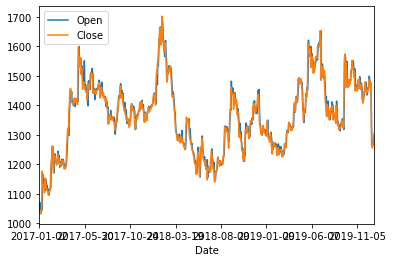

In [14]:
#Plot  stock
share_price_df[share_price_df['stockname']=='BOM500002'].plot(x='Date',
                    y=['Open','Close'],kind='line')


In [22]:
#Pivot based on stockname for only Close price
share_price_pivot_df=share_price_df.pivot(index='Date', columns='stockname')['Close'].reset_index()
share_price_pivot_df.head()

stockname,Date,BOM500002,BOM500003,BOM500008,BOM500009,BOM500010,BOM500012,BOM500013,BOM500014,BOM500020,BOM500023
0,2017-01-02,1039.95,131.05,896.20,7.09,1219.25,21.60,15.30,2.37,48.80,NaN
1,2017-01-03,1045.05,132.50,890.20,7.25,1215.25,21.70,15.32,2.43,48.80,106.95
2,2017-01-04,1037.35,131.75,898.50,7.26,1212.50,22.75,15.28,2.47,50.90,NaN
3,2017-01-05,1031.45,131.65,916.35,7.34,1216.55,23.85,15.48,2.41,53.85,101.10
4,2017-01-06,1043.90,130.10,928.05,7.40,1222.15,24.95,15.11,2.45,53.30,NaN


In [21]:
share_price_pivot_df.columns

Index(['Date', 'BOM500002', 'BOM500003', 'BOM500008', 'BOM500009', 'BOM500010',
       'BOM500012', 'BOM500013', 'BOM500014', 'BOM500020', 'BOM500023'],
      dtype='object', name='stockname')

In [24]:
#changing Index name to None 
share_price_pivot_df.columns.name = None
share_price_pivot_df.head()

,Date,BOM500002,BOM500003,BOM500008,BOM500009,BOM500010,BOM500012,BOM500013,BOM500014,BOM500020,BOM500023
0,2017-01-02,1039.95,131.05,896.20,7.09,1219.25,21.60,15.30,2.37,48.80,NaN
1,2017-01-03,1045.05,132.50,890.20,7.25,1215.25,21.70,15.32,2.43,48.80,106.95
2,2017-01-04,1037.35,131.75,898.50,7.26,1212.50,22.75,15.28,2.47,50.90,NaN
3,2017-01-05,1031.45,131.65,916.35,7.34,1216.55,23.85,15.48,2.41,53.85,101.10
4,2017-01-06,1043.90,130.10,928.05,7.40,1222.15,24.95,15.11,2.45,53.30,NaN
